# Food delivery Time prediction

# Data Preprocessing

## Data Profiling

### Data Understanding

In [1]:
# importing required libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
# 2nd part
from geopy.distance import geodesic 
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'uber-eats-deliveries.csv')
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
# understanding the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [4]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [5]:
data.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [6]:
data['Delivery_person_Age'].sort_index().value_counts()

Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64

In [7]:
# data['Delivery_person_ID'].nunique()
a = data['Delivery_person_ID'].value_counts()
print(a.sort_index())

Delivery_person_ID
AGRRES010DEL01     14
AGRRES010DEL02     15
AGRRES010DEL03     13
AGRRES01DEL01      12
AGRRES01DEL02      14
                   ..
VADRES19DEL02      59
VADRES19DEL03      41
VADRES20DEL01      59
VADRES20DEL02      50
VADRES20DEL03      37
Name: count, Length: 1320, dtype: int64


In [8]:
# value counts od road traffic density
data['Road_traffic_density'].value_counts()

Road_traffic_density
Low        15477
Jam        14143
Medium     10947
High        4425
NaN          601
Name: count, dtype: int64

In [9]:
# value counts of weather_conditions
data['Weatherconditions'].value_counts()

Weatherconditions
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
conditions NaN            616
Name: count, dtype: int64

### Data cleaning

In [10]:
#  renaming the columns
data = data.rename(columns={"Weatherconditions":"Weather_conditions","multiple_deliveries":"Multiple_deliveries",
                            'City':'City_type'})
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City_type,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [11]:
# checking null values
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
Multiple_deliveries            0
Festival                       0
City_type                      0
Time_taken(min)                0
dtype: int64

In [12]:
#Extract relevant values from column
def extract_column_value(data):
    #Extract time and convert to int
    data['Time_taken(min)'] = data['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    data['Weather_conditions'] = data['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    data['City_code']=data['Delivery_person_ID'].str.split("RES", expand=True)[0]
    
extract_column_value(data)
data[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [13]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City_type,Time_taken(min),City_code
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,INDO
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,BANG
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,BANG
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,COIMB
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,CHEN


In [14]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
    
print("Before No. of columns: ",data.shape[1])
a = drop_columns(data)
print("After No. of columns: ",data.shape[1])

Before No. of columns:  21
After No. of columns:  19


In [15]:
#Check for Duplicate Values
if (len(data[data.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [16]:
data.dtypes

Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
Multiple_deliveries             object
Festival                        object
City_type                       object
Time_taken(min)                  int64
City_code                       object
dtype: object

In [17]:
# Update datatypes
def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['Multiple_deliveries'] = df['Multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
    
update_datatype(data)

In [18]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)
convert_nan(data)

In [19]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Multiple_deliveries,Festival,City_type,Time_taken(min),City_code
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN


In [20]:
#Check null values
data.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City_type                      1200
Multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Delivery_location_longitude       0
Time_Order_picked                 0
Delivery_location_latitude        0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
City_code                         0
dtype: int64

In [21]:
# #Let's explore columns that have null values
# cols = ['Delivery_person_Age','Delivery_person_Ratings','Weather_conditions','Road_traffic_density','Multiple_deliveries','Festival','City_type','City_code']
# num_plots = len(cols)
# num_rows = (num_plots // 2) + (num_plots % 2)

# fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

# for i, column_name in enumerate(cols):
#     row = i // 2
#     col = i % 2

#     ax = axes[row, col]
#     sns.countplot(data=data, x=column_name, order=data[column_name].value_counts().sort_index().index, ax=ax)

#     ax.set_xlabel(column_name)
#     ax.set_ylabel('No. of Orders')
#     ax.set_title(column_name)
#     ax.tick_params(axis='x', rotation=45)
    
# if num_plots % 2 != 0:
#     fig.delaxes(axes[-1, -1])

# plt.tight_layout()
# plt.show()

### Exploratory Data Analysis

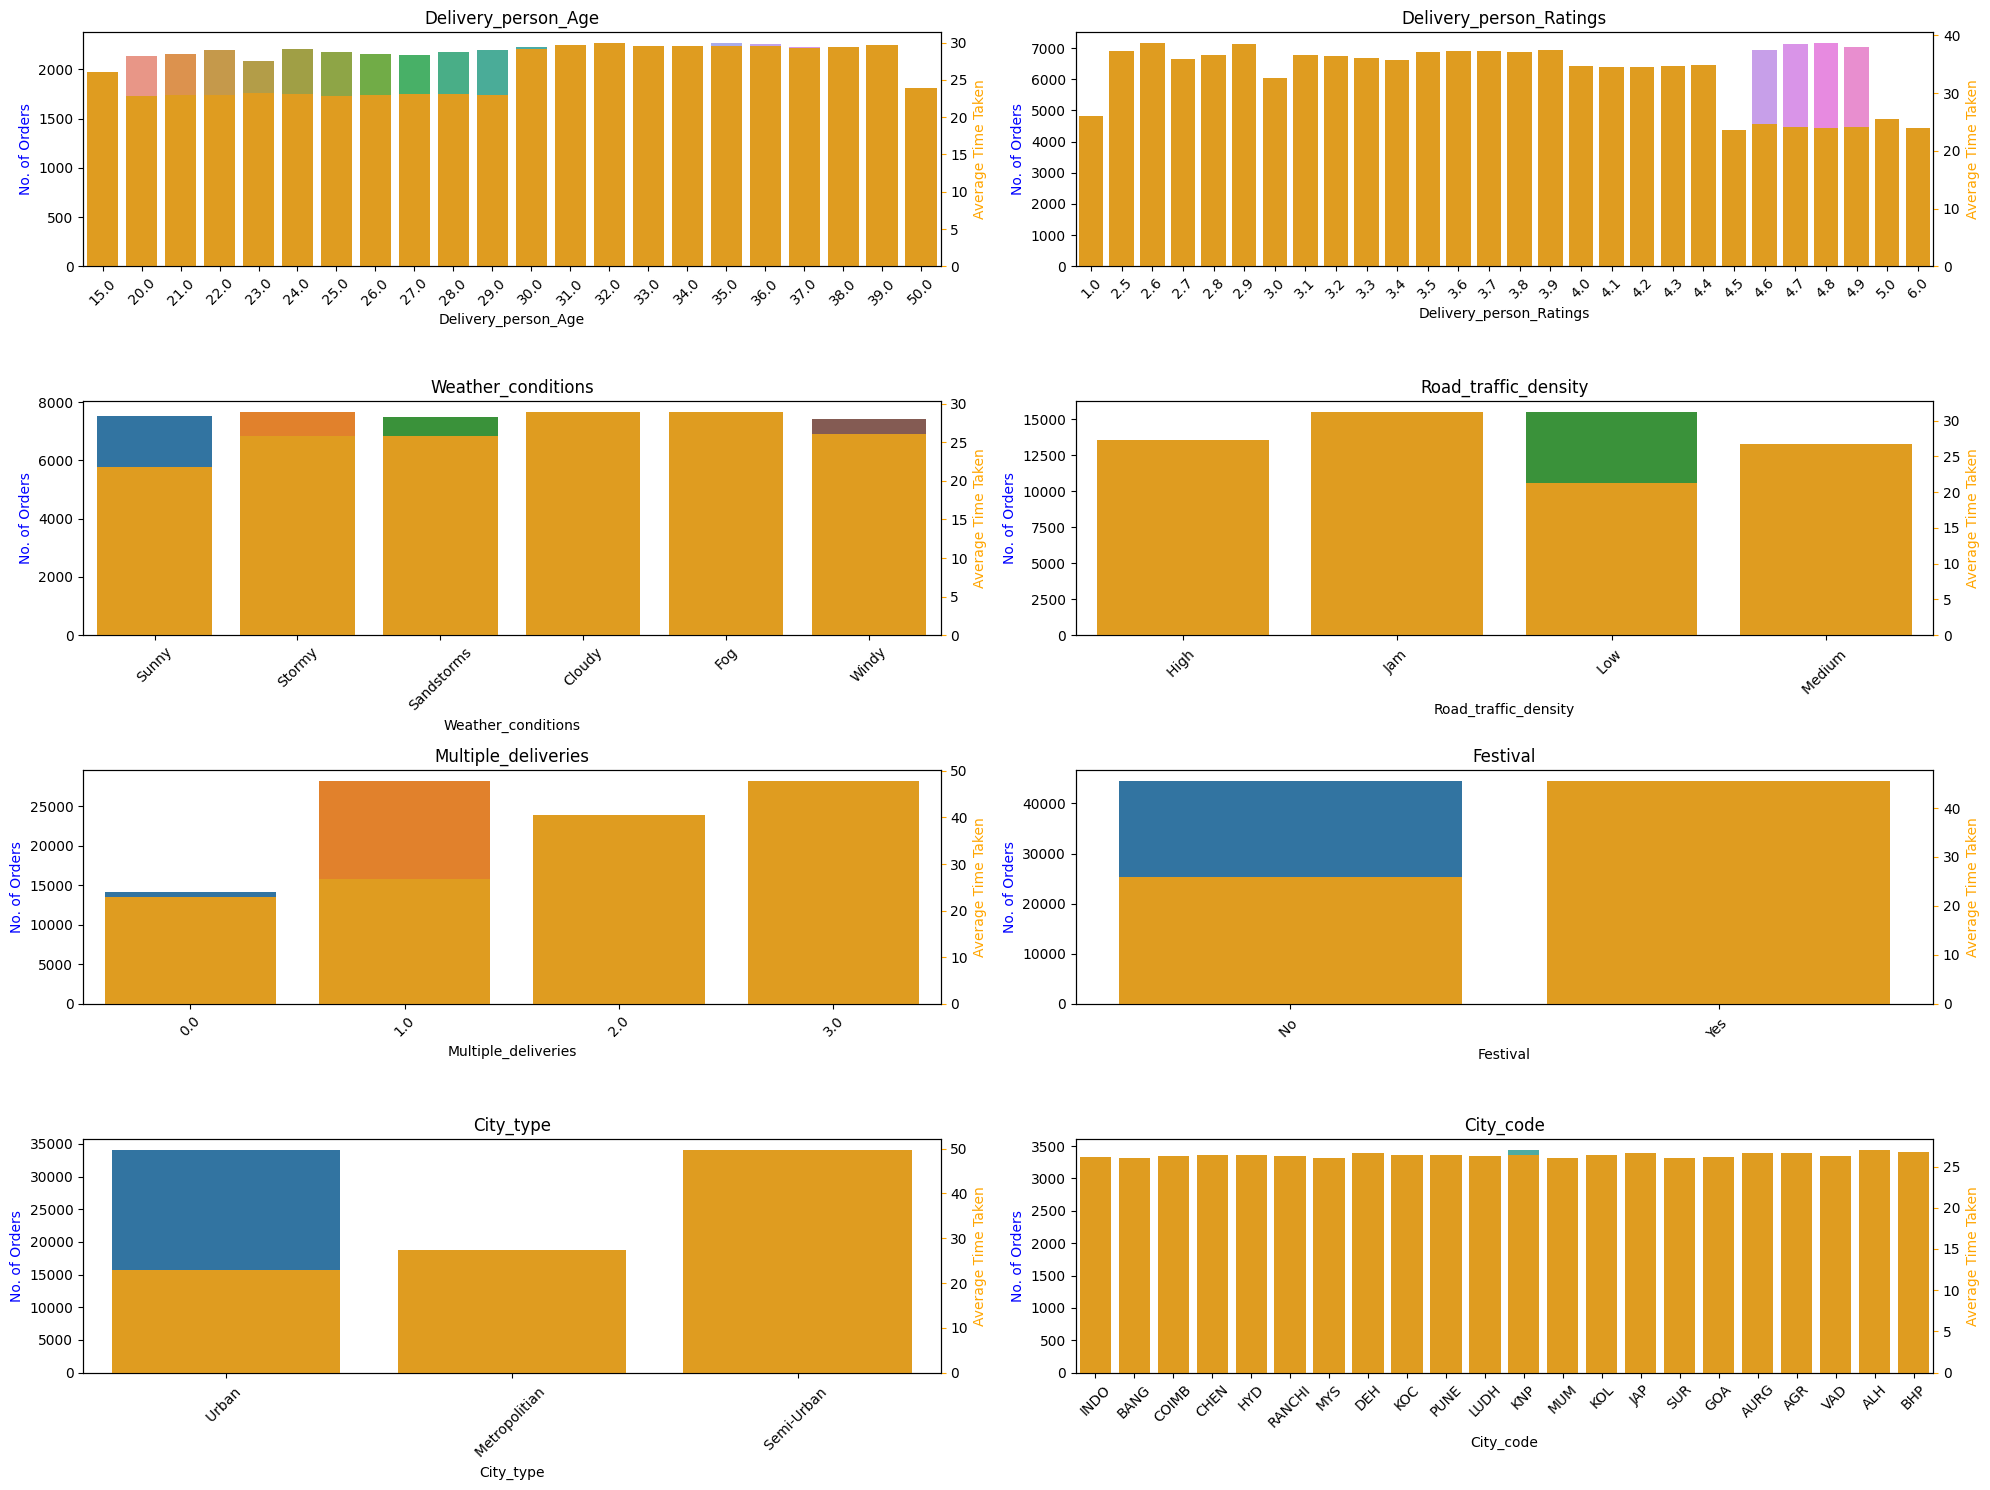

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the relevant columns

cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions', 'Road_traffic_density', 
        'Multiple_deliveries', 'Festival', 'City_type', 'City_code']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20, 15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax1 = axes[row, col]
    sns.countplot(data=data, x=column_name, order=data[column_name].value_counts().sort_index().index, ax=ax1)

    ax1.set_xlabel(column_name)
    ax1.set_ylabel('No. of Orders', color='blue')
    ax1.tick_params(axis='x', rotation=45)

    # Creating a twin Axes sharing the x-axis
    ax2 = ax1.twinx()
    sns.barplot(data=data, x=column_name, y='Time_taken(min)', estimator='mean', ci=None, ax=ax2, color='orange')

    ax2.set_ylabel('Average Time Taken', color='orange')
    ax2.tick_params(axis='y', color='orange')

    ax1.set_title(column_name)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()


In [23]:
#Handle null values
def handle_null_values(data):
    data['Delivery_person_Age'].fillna(np.random.choice(data['Delivery_person_Age']), inplace=True)
    data['Weather_conditions'].fillna(np.random.choice(data['Weather_conditions']), inplace=True)
    data['City_type'].fillna(data['City_type'].mode()[0], inplace=True)
    data['Festival'].fillna(data['Festival'].mode()[0], inplace=True)
    data['Multiple_deliveries'].fillna(data['Multiple_deliveries'].mode()[0], inplace=True)
    data['Road_traffic_density'].fillna(data['Road_traffic_density'].mode()[0], inplace=True)
    data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].median(), inplace=True)
    
handle_null_values(data)
data.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Multiple_deliveries               0
Festival                          0
City_type                         0
Time_taken(min)                   0
City_code                         0
dtype: int64

## Feature Engineering

### Feature Extraction

In [24]:
def extract_date_features(data):
    data['day_of_week'] = data["Order_Date"].dt.dayofweek.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)
    data["day"] = data["Order_Date"].dt.day
    data["month"] = data["Order_Date"].dt.month

# Assuming 'data' is the DataFrame containing the 'Order_Date' column
extract_date_features(data)
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,Multiple_deliveries,Festival,City_type,Time_taken(min),City_code,day_of_week,is_weekend,day,month
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,motorcycle,0.0,No,Urban,24,INDO,5,1,19,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,scooter,1.0,No,Metropolitian,33,BANG,4,0,25,3
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,motorcycle,1.0,No,Urban,26,BANG,5,1,19,3
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,motorcycle,1.0,No,Metropolitian,21,COIMB,1,0,5,4
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,scooter,1.0,No,Metropolitian,30,CHEN,5,1,26,3


In [25]:
def calculate_time_diff(data):
    # Convert time columns to timedelta
    data['Time_Orderd'] = pd.to_timedelta(data['Time_Orderd'])
    data['Time_Order_picked'] = pd.to_timedelta(data['Time_Order_picked'])
    
    # Calculate pickup time accounting for cases where pickup is on the next day
    data['Time_Order_picked_formatted'] = data.apply(lambda row: row['Order_Date'] + row['Time_Order_picked'] if row['Time_Order_picked'] >= row['Time_Orderd'] else row['Order_Date'] + pd.Timedelta(days=1) + row['Time_Order_picked'], axis=1)
    
    # Calculate formatted order time
    data['Time_Ordered_formatted'] = data['Order_Date'] + data['Time_Orderd']
    
    # Calculate the time difference in minutes
    data['order_prepare_time'] = (data['Time_Order_picked_formatted'] - data['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Handle null values by filling with the median
    data['order_prepare_time'].fillna(data['order_prepare_time'].median(), inplace=True)
    
    # Drop unnecessary columns to the model
    data.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)

# Assuming 'data' is your DataFrame
calculate_time_diff(data)
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Multiple_deliveries,Festival,City_type,Time_taken(min),City_code,day_of_week,is_weekend,day,month,order_prepare_time
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,0.0,No,Urban,24,INDO,5,1,19,3,15.0
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,1.0,No,Metropolitian,33,BANG,4,0,25,3,5.0
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,1.0,No,Urban,26,BANG,5,1,19,3,15.0
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1.0,No,Metropolitian,21,COIMB,1,0,5,4,10.0
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,1.0,No,Metropolitian,30,CHEN,5,1,26,3,15.0


In [26]:
# How to Calculate Distance between Two Points using Geopy in Python
# tham khảo tại: https://www.section.io/engineering-education/using-geopy-to-calculate-the-distance-between-two-points/
# from geopy.distance import geodesic

In [27]:
#Calculate distance between restaurant location & delivery location
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")
    
calculate_distance(data)
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City_type,Time_taken(min),City_code,day_of_week,is_weekend,day,month,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,No,Urban,24,INDO,5,1,19,3,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,No,Metropolitian,33,BANG,4,0,25,3,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,No,Urban,26,BANG,5,1,19,3,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,No,Metropolitian,21,COIMB,1,0,5,4,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,No,Metropolitian,30,CHEN,5,1,26,3,15.0,6


### Feature Encoding

In [28]:
encoder = LabelEncoder()

In [29]:
data['Weather_conditions'] = encoder.fit_transform(data['Weather_conditions'])
Weather_conditions_dic = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
Weather_conditions_dic

{0: 'Cloudy', 1: 'Fog', 2: 'Sandstorms', 3: 'Stormy', 4: 'Sunny', 5: 'Windy'}

In [30]:
data['Road_traffic_density'] = encoder.fit_transform(data['Road_traffic_density'])
Road_traffic_density_dic = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
Road_traffic_density_dic

{0: 'High ', 1: 'Jam ', 2: 'Low ', 3: 'Medium '}

In [31]:
data['Type_of_order'] = encoder.fit_transform(data['Type_of_order'])
Type_of_order_dic = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
Type_of_order_dic

{0: 'Buffet ', 1: 'Drinks ', 2: 'Meal ', 3: 'Snack '}

In [32]:
data['Type_of_vehicle'] = encoder.fit_transform(data['Type_of_vehicle'])
Type_of_vehicle_dic = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
Type_of_vehicle_dic

{0: 'bicycle ', 1: 'electric_scooter ', 2: 'motorcycle ', 3: 'scooter '}

In [33]:
data['Festival'] = encoder.fit_transform(data['Festival'])
Festival_dic = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
Festival_dic

{0: 'No ', 1: 'Yes '}

In [34]:
data['City_type'] = encoder.fit_transform(data['City_type'])
City_dic = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
City_dic

{0: 'Metropolitian ', 1: 'Semi-Urban ', 2: 'Urban '}

In [35]:
data.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City_type,Time_taken(min),City_code,day_of_week,is_weekend,day,month,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,0,2,24,INDO,5,1,19,3,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,0,0,33,BANG,4,0,25,3,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,0,2,26,BANG,5,1,19,3,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,0,0,21,COIMB,1,0,5,4,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,0,0,30,CHEN,5,1,26,3,15.0,6


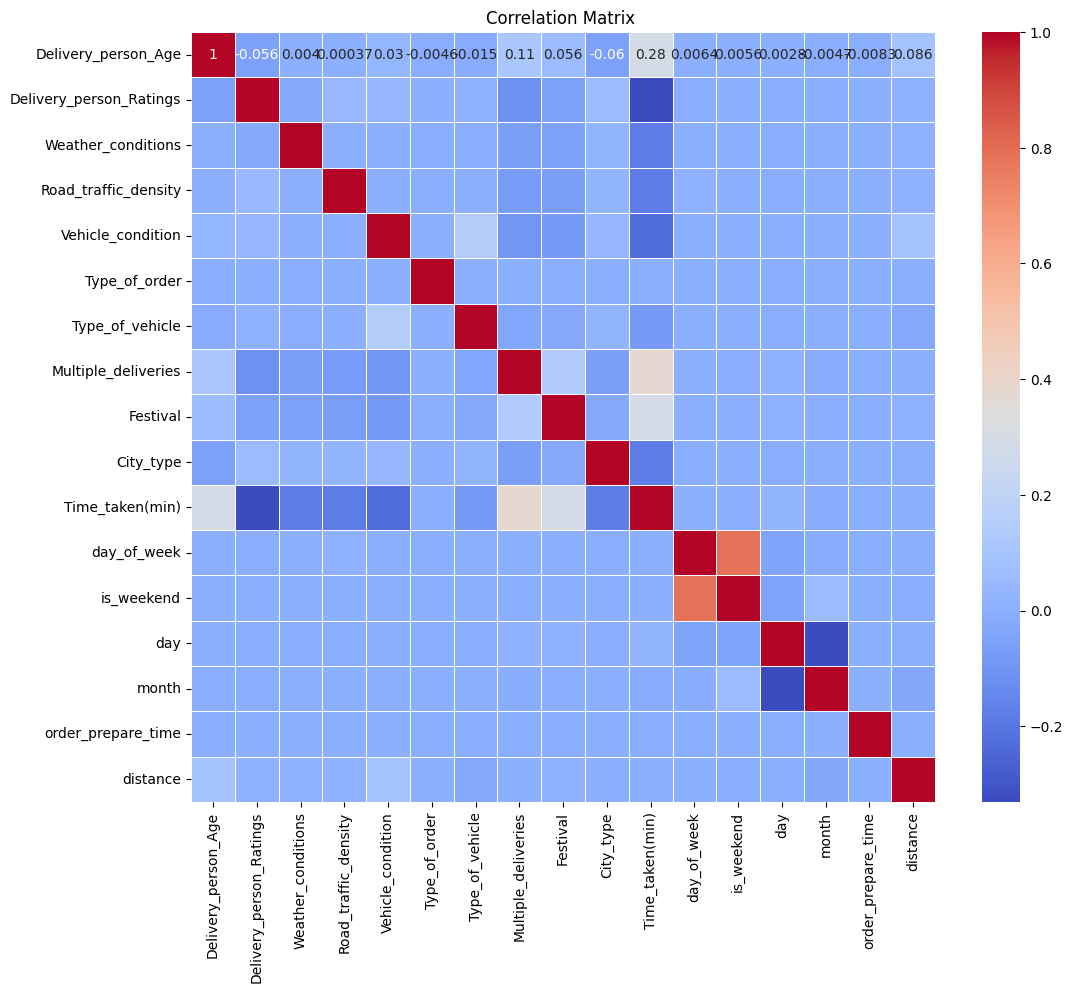

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Columns to exclude from correlation
exclude_columns = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'City_code']

# Copy 'data' to avoid modifying the original DataFrame
data_filtered = data.copy()

# Drop the columns to be excluded
data_filtered = data_filtered.drop(exclude_columns, axis=1, errors='ignore')

# Calculate the correlation matrix
correlation_matrix = data_filtered.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix ')
plt.show()


### Feature Selection

In [37]:
#Split features & label
X = data.drop(['Time_taken(min)', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude','City_code', 'day_of_week'], axis=1)  # Features
y = data['Time_taken(min)']  # Target variable

# Model Building

## Data Splitting

In [38]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 15)
(36474,)
(9119, 15)
(9119,)


## Feature Scaling

In [39]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

## Model Selection

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define the models
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=42, n_jobs=-1),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
]

## Model Training

In [41]:

model_names = ["LinearRegression", "RandomForestRegressor", "AdaBoostRegressor", "KNeighborsRegressor",
               "DecisionTreeRegressor", "GradientBoostingRegressor", "XGBRegressor", "LGBMRegressor"]

MAE = []
MSE = []
RMSE = []
R_2 = []
accuracy = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    MAE.append(round(mean_absolute_error(y_true=y_test, y_pred=y_pred), 5))
    MSE.append(round(mean_squared_error(y_true=y_test, y_pred=y_pred), 5))
    RMSE.append(sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
    R_2.append(r2_score(y_true=y_test, y_pred=y_pred))
    accuracy.append((model.score(X_test, y_test)) * 100)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 36474, number of used features: 15
[LightGBM] [Info] Start training from score 26.301612


# Model Evaluation and Tunning

## Model Evaluation

In [42]:
# Create a DataFrame to store the results
model_results = pd.DataFrame({
    'Modelling Name': model_names,
    'MAE': MAE,
    'MSE': MSE,
    'RMSE': RMSE,
    'R_2': R_2,
    'Accuracy': accuracy,
})

# Display the results
model_results


,Modelling Name,MAE,MSE,RMSE,R_2,Accuracy
0,LinearRegression,5.67563,50.40914,7.099939,0.425066,42.506607
1,RandomForestRegressor,3.22363,16.64910,4.080331,0.810111,81.011118
2,AdaBoostRegressor,5.00711,37.21873,6.100716,0.575507,57.550725
3,KNeighborsRegressor,5.19785,44.09755,6.640599,0.497052,49.705187
4,DecisionTreeRegressor,4.25886,31.31717,5.596174,0.642817,64.281669
5,GradientBoostingRegressor,3.55662,19.91604,4.462740,0.772851,77.285050
6,XGBRegressor,3.19127,16.29374,4.036550,0.814164,81.416417
7,LGBMRegressor,3.14900,15.57910,3.947037,0.822315,82.231488


## Model Tunning

In [43]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the parameter grids for each model
param_grids = [
    {},  # Linear Regression
    {'n_estimators': [100, 200, 300], 'max_depth': [None, 3, 5]},  # RandomForestRegressor
    {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5]},  # AdaBoostRegressor
    {'n_neighbors': [3, 5, 7]},  # KNeighborsRegressor
    {'max_depth': [None, 3, 5]},  # DecisionTreeRegressor
    {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.5]},  # GradientBoostingRegressor
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9], 'learning_rate': [0.01, 0.1, 0.5]},  # XGBRegressor
    {'n_estimators': [20, 25, 30], 'max_depth': [None, 3, 5], 'learning_rate': [0.01, 0.1, 0.5]}  # LGBMRegressor
]

# Create an empty DataFrame to store the results
grid_results = pd.DataFrame(columns=['Modelling Name', 'Best Parameters', 'Best R2 Score'])

# Loop through each model and its corresponding parameter grid
for i, (model, param_grid) in enumerate(zip(models, param_grids)):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    # Extract the best mean cross-validated score from cv_results_
    best_params = grid_search.best_params_
    best_score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]

    # Concatenate the results to the DataFrame
    grid_results = pd.concat([
        grid_results,
        pd.DataFrame({
            'Modelling Name': [model_names[i]],
            'Best Parameters': [best_params],
            'Best R2 Score': [best_score]
        })
    ], ignore_index=True)

# Display the results
grid_results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 29179, number of used features: 15
[LightGBM] [Info] Start training from score 26.331917
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 29179, number of used features: 15
[LightGBM] [Info] Start training from score 26.254464
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

,Modelling Name,Best Parameters,Best R2 Score
0,LinearRegression,{},0.419180
1,RandomForestRegressor,"{'max_depth': None, 'n_estimators': 300}",0.814854
2,AdaBoostRegressor,"{'learning_rate': 0.5, 'n_estimators': 50}",0.603768
3,KNeighborsRegressor,{'n_neighbors': 7},0.502933
4,DecisionTreeRegressor,{'max_depth': None},0.650325
5,GradientBoostingRegressor,"{'learning_rate': 0.5, 'n_estimators': 150}",0.792885
6,XGBRegressor,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",0.819140
7,LGBMRegressor,"{'learning_rate': 0.5, 'max_depth': None, 'n_e...",0.819154


## Model Creation

In [44]:
# Create a XGB regressor model
model = XGBRegressor(n_estimators=20,max_depth=9)

In [45]:
# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [47]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))
print("Accuracy of the model:",round(accuracy,0))

Mean Absolute Error (MAE): 3.16
Mean Squared Error (MSE): 15.94
Root Mean Squared Error (RMSE): 3.99
R-squared (R2) Score: 0.82
Accuracy of the model: 82.0


## Model Saving

In [48]:
import pickle

In [49]:
import pickle

with open('Model.pkl', 'wb') as file:
  pickle.dump(model, file)

with open('Scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)